Note: this notebook is deprecated. Check the `Kmean.ipynb` notebook for the latest implementation

K Means Clustering from Scratch

CS Practical - K-Means:

- Step 1 - Pick K random points as cluster centers called centroids.
- Step 2 - Assign each x to the nearest cluster by calculating its distance to each centroid (start with Euclidean).
- Step 3 - Find the new cluster center by taking the average of the assigned points.
- Step 4 - Repeat Step 2 and 3 for a given number of iterations until none of the cluster assignments change.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [85]:
class KMeans:
    def __init__(self, x, clusters, iters):
        self.clusters = clusters
        self.iters = iters
        self.x = np.array(x)
        self.all_labels,self.all_centers = [],[]
    
    def normalize(x):
        return (x-np.mean(x))/x.std()

    
    def distance(self,x1,x2):
        assert x1.shape == x2.shape, f"shapes don't match {x1.shape} != {x2.shape} "
        return math.sqrt(sum([(x1[i]-x2[i])**2 for i in range(len(x1))]))
    
    def generate_random_points(self):
        return np.random.randn(self.clusters,self.x.shape[1])
    
    def get_labels(self):
        labels = []
        for i,point in enumerate(self.x): 
            min_dist = float('inf')
            best_cluster = None
            for ic, center in enumerate(self.centers):
                dist = self.distance(point,center)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = ic
            labels.append(best_cluster)
        return np.array(labels)
    
    def set_centers(self,i):
        if i == 0: 
            return self.generate_random_points()
        centers = []
        for j in range(self.clusters):
            m = self.x[self.labels==j].mean(0)
            centers.append(m)
        return np.array(centers)
            
    def fit(self):
        for i in range(self.iters):
            self.centers = self.set_centers(i)
            self.labels = self.get_labels()  
            self.all_centers.append(self.centers)
            self.all_labels.append(self.labels)

In [86]:
x = np.random.randn(100,2)

k = KMeans(x,3,50)

k.fit()

k.labels

array([0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1])

In [87]:
len(k.all_centers)

50

iter 0


/Users/devsharma/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


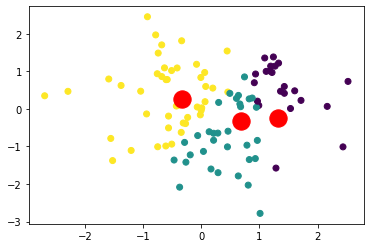

iter 1


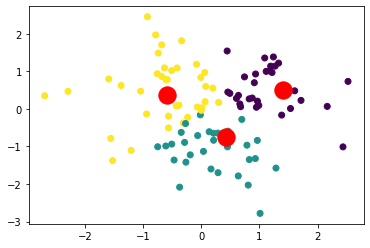

iter 2


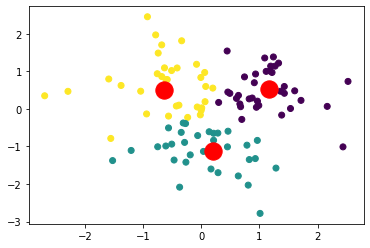

iter 3


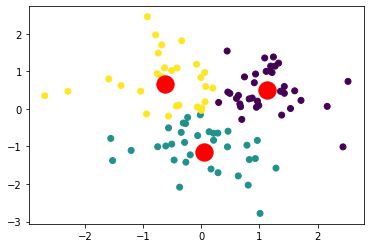

iter 4


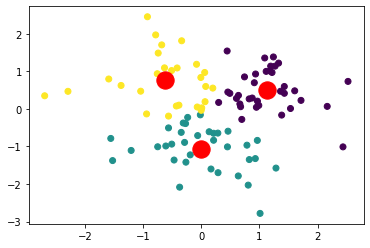

iter 5


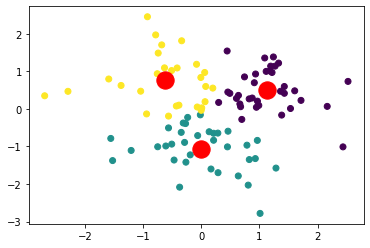

iter 6


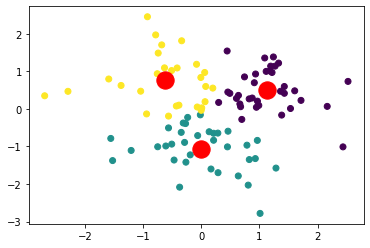

iter 7


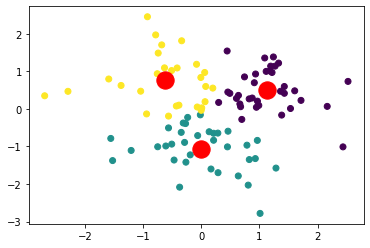

iter 8


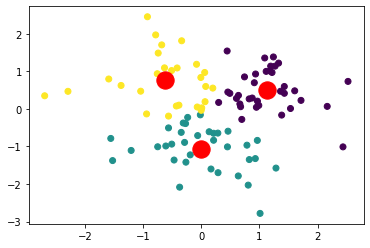

iter 9


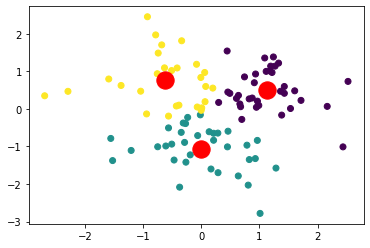

iter 10


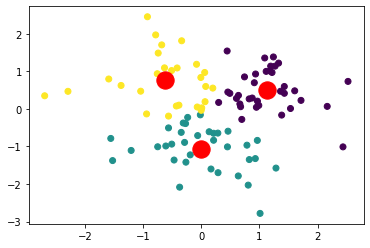

iter 11


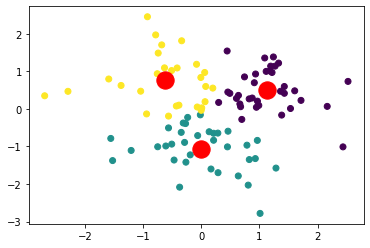

iter 12


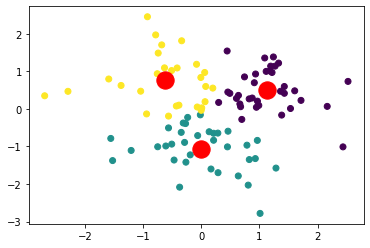

iter 13


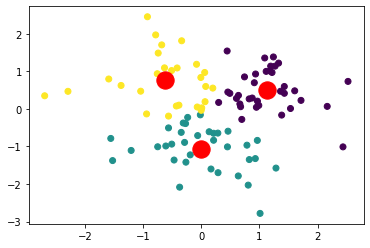

iter 14


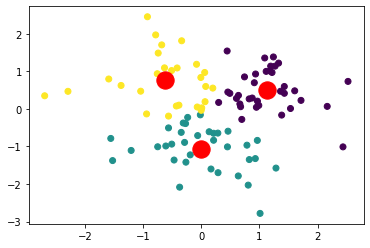

iter 15


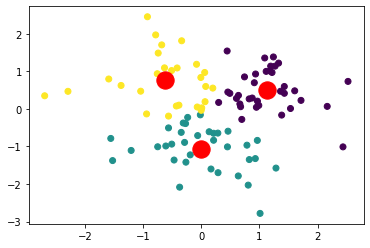

iter 16


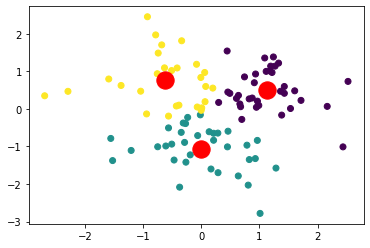

iter 17


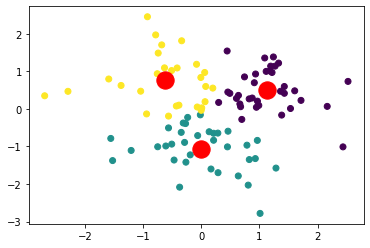

iter 18


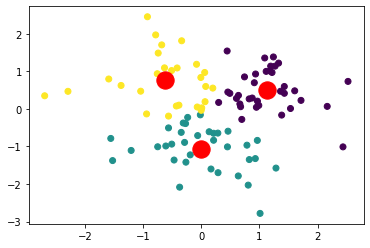

iter 19


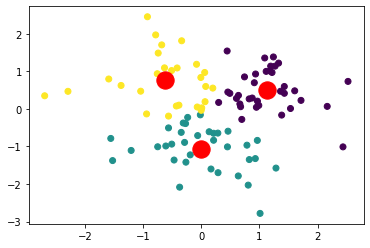

iter 20


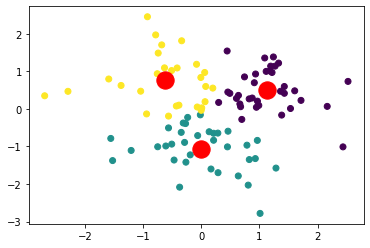

iter 21


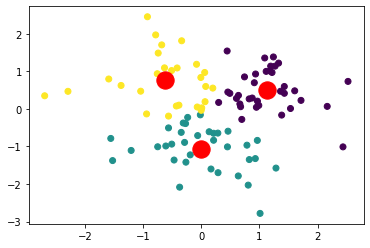

iter 22


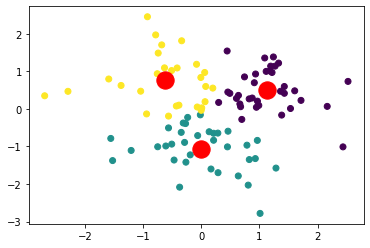

iter 23


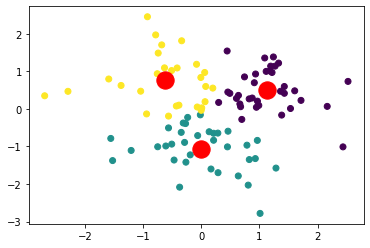

iter 24


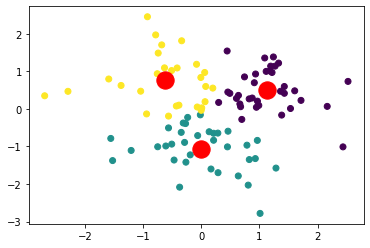

iter 25


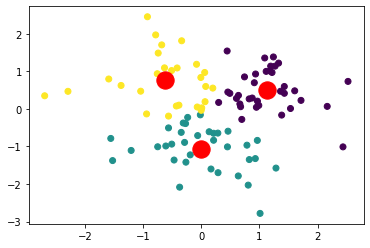

iter 26


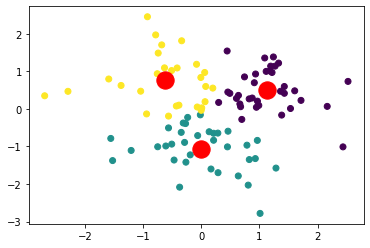

iter 27


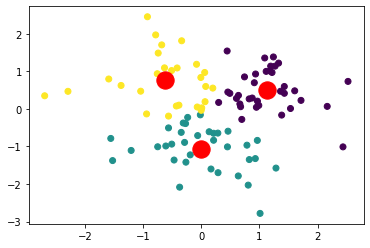

iter 28


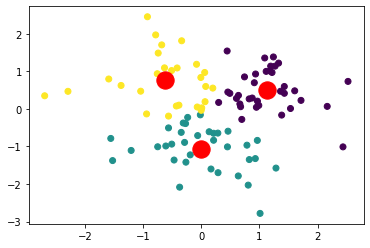

iter 29


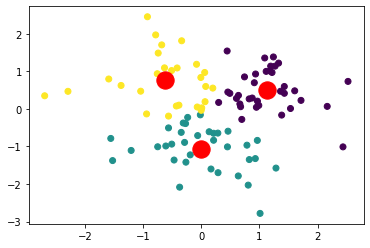

iter 30


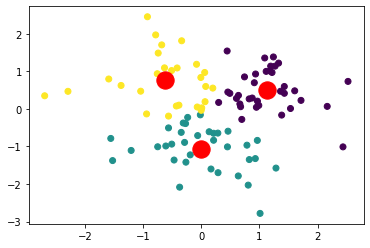

iter 31


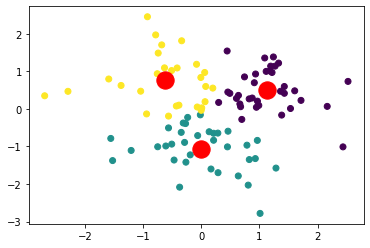

iter 32


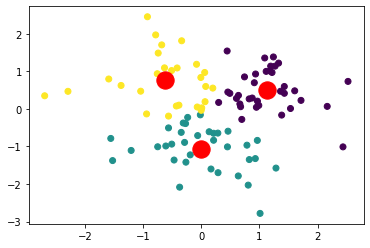

iter 33


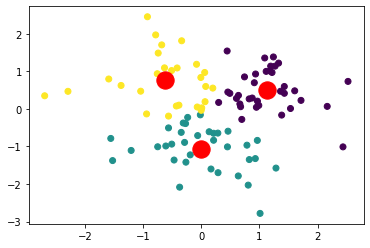

iter 34


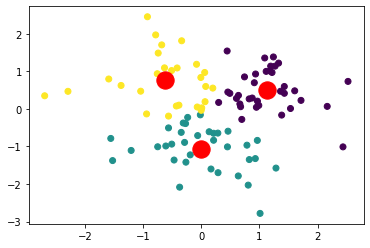

iter 35


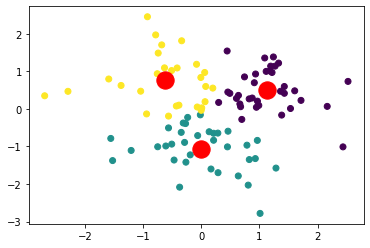

iter 36


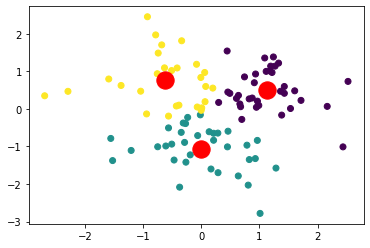

iter 37


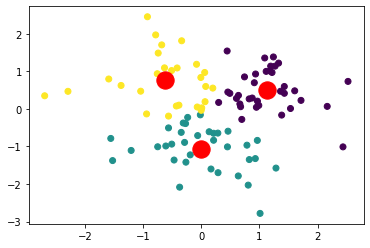

iter 38


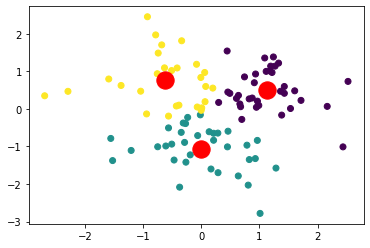

iter 39


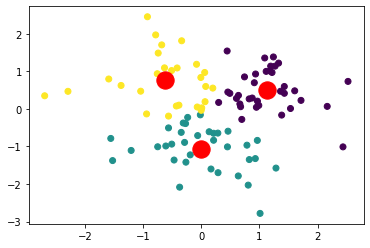

iter 40


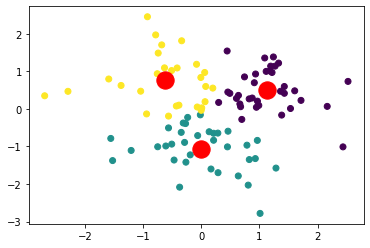

iter 41


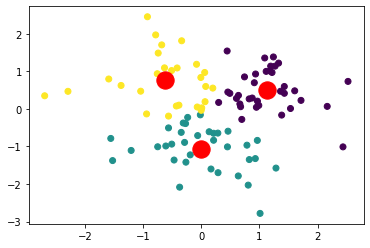

iter 42


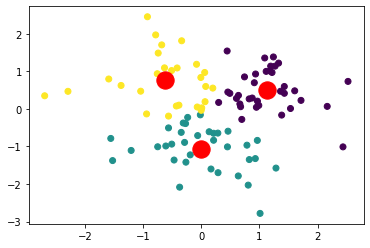

iter 43


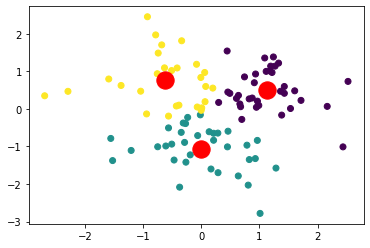

iter 44


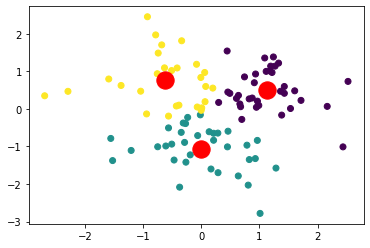

iter 45


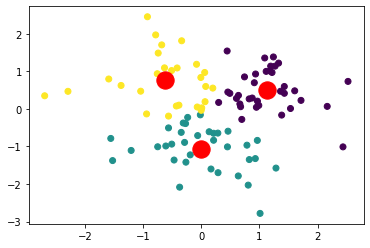

iter 46


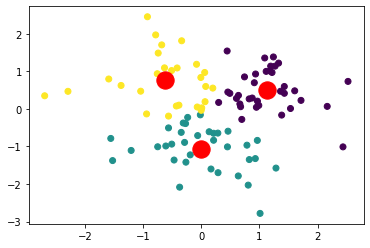

iter 47


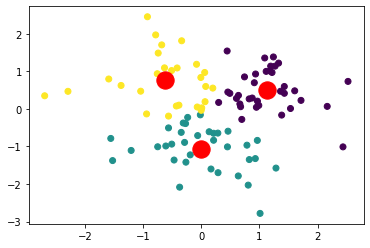

iter 48


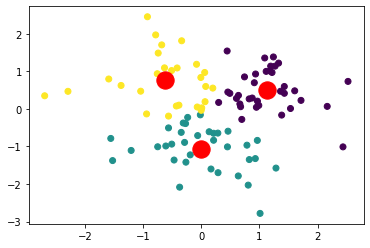

iter 49


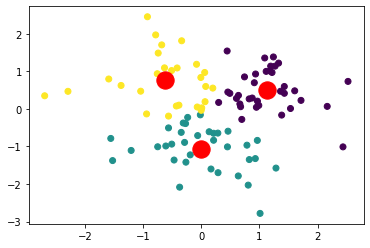

In [82]:
# draw the figure so the animations will work
fig = plt.gcf()
fig.show()
fig.canvas.draw()
i = 0
for centers,labels in zip(k.all_centers,k.all_labels):
    if i%1==0:
        print(f"iter {i}")
        plt.scatter(x[:,0],x[:,1],c=labels) # plot something
        cxs, cys = zip(*centers)
        plt.scatter(x=cxs,y=cys,s=300,marker="o",c="red")
        # update canvas immediately
        plt.pause(0.01) 
        fig.canvas.draw()
        
    i+=1

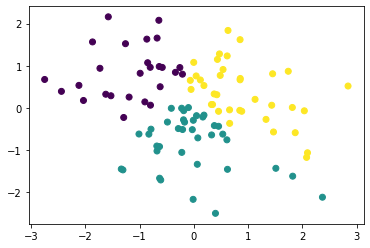

In [54]:
plt.scatter(x[:,0],x[:,1],c=k.labels)

# Bonus PCA

https://www.youtube.com/watch?v=rng04VJxUt4

Note: PCA should usually be done prior to K-means

In [33]:
x = np.random.randn(100,10)
k = KMeans(x,3,3)
k.fit()
k.labels

array([1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1,
       2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1])

In [34]:
def pca(x,k):
    """
    provide m x n matrix where m are examples and n are features 
    """
    x = x.T
    cov = np.cov(x)
    u,_,_ = np.linalg.svd(cov)
    u = u[:,:k]
    res = u.T@x
    return res.T

In [35]:
x_pca = pca(x,2)

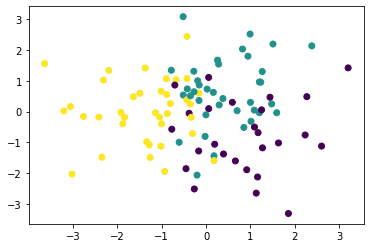

In [36]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=k.labels)